In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


**# Load and Preprocess the Data**


In [ ]:
df = pd.read_csv("/content/Placement_Data_Full_class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
df.shape

(215, 15)

Handle Missing Values

In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [ ]:
# Fill missing values for categorical features with the mode
categorical_features = df.select_dtypes(include=[object]).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

In [ ]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Encode Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode target variable 'status'
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [ ]:
# One-hot encode categorical features
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
# Define feature matrix X and target vector y
X = df.drop('status', axis=1)
y = df['status']

# **Exploratory Data Analysis (EDA)**

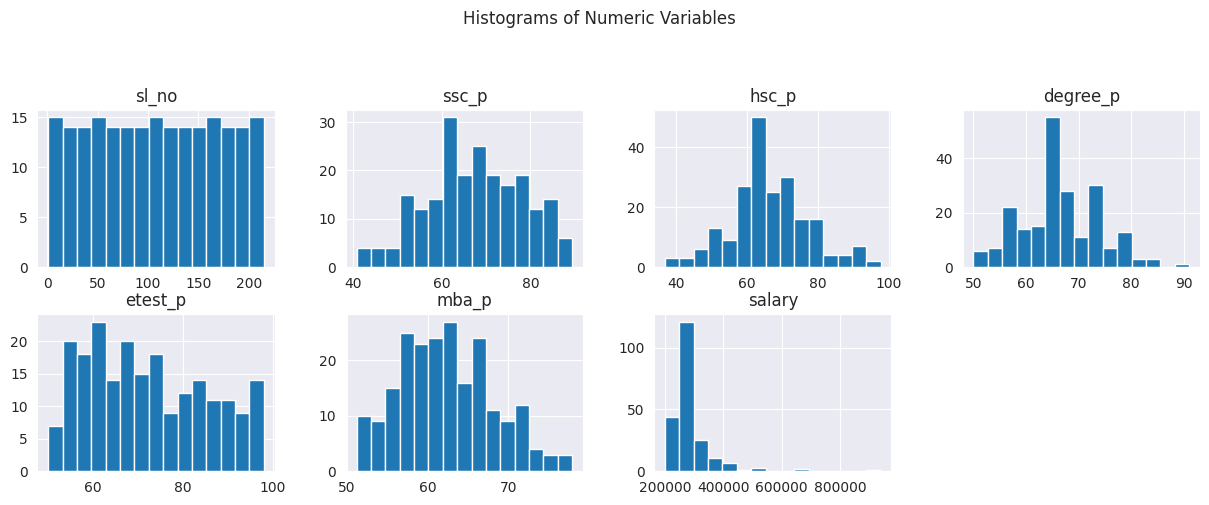

In [ ]:
# Plot histograms for numeric columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

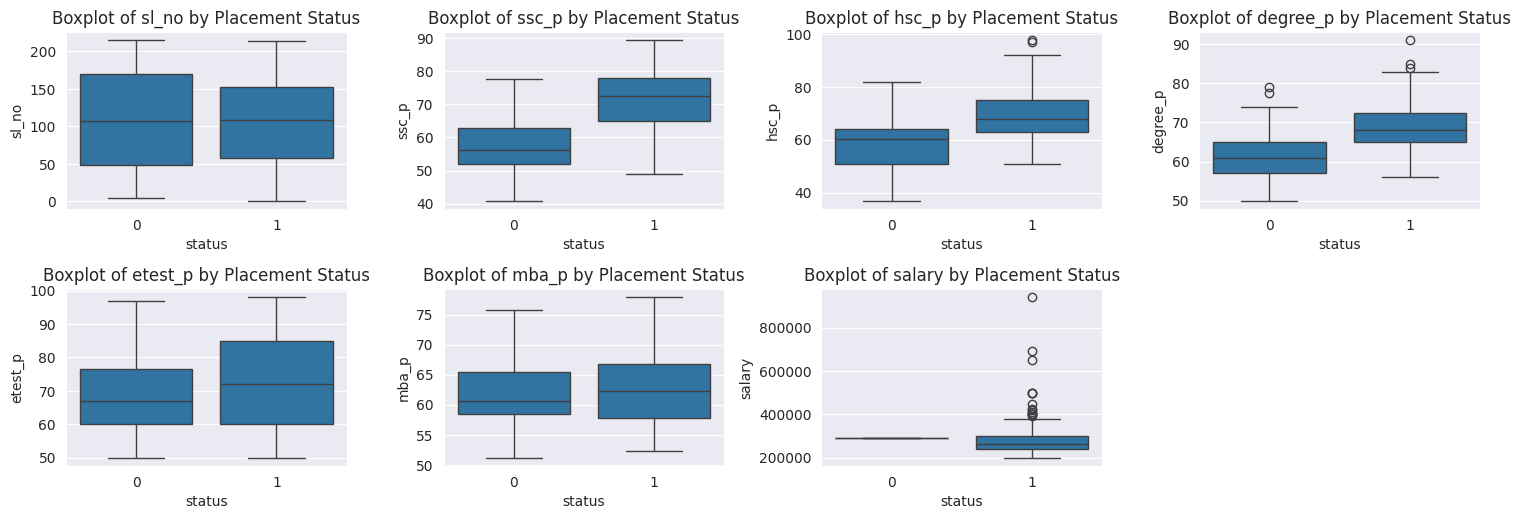

In [ ]:
# Plot boxplots for numeric columns grouped by placement status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Placement Status')
plt.tight_layout()
plt.show()

Higher SSC, HSC, and degree percentages are positively correlated with placement status.
Students with higher academic scores in their degree and MBA programs have better placement chances.
This emphasizes the importance of academic performance in securing campus placements.




Employability test scores have a positive but less pronounced impact on placement status.
Students with higher test scores are slightly more likely to be placed, indicating that these tests measure important competencies valued by employers.


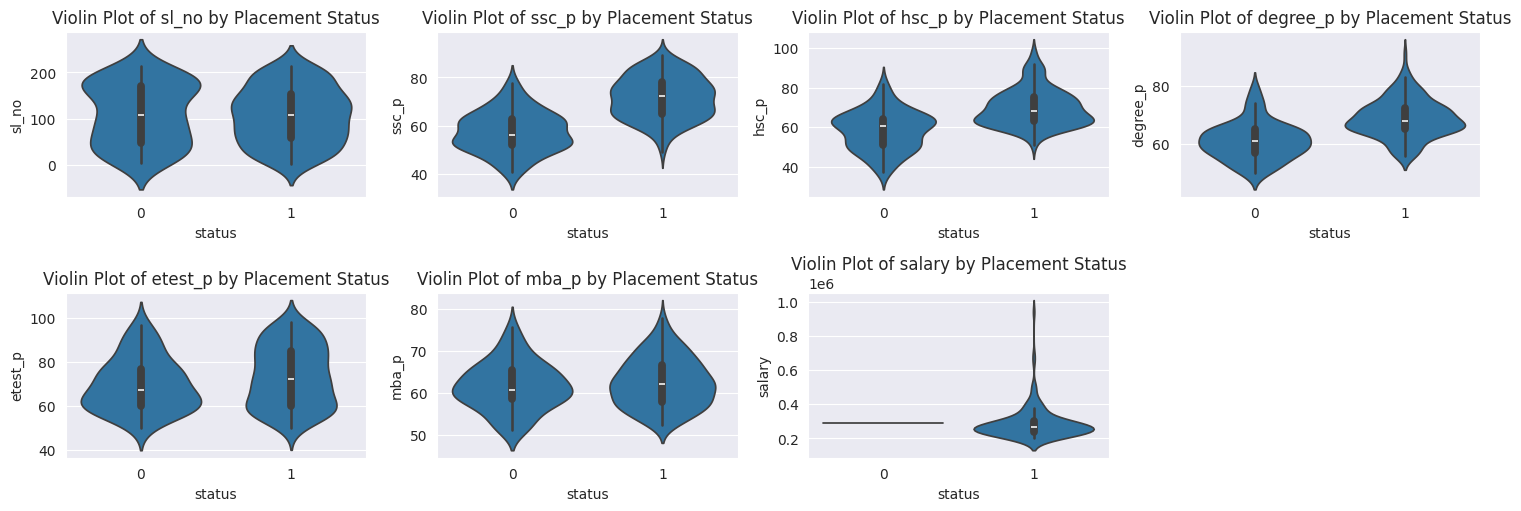

In [ ]:
# Plot violin plots for numeric columns grouped by placement status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x='status', y=col, data=df)
    plt.title(f'Violin Plot of {col} by Placement Status')
plt.tight_layout()
plt.show()

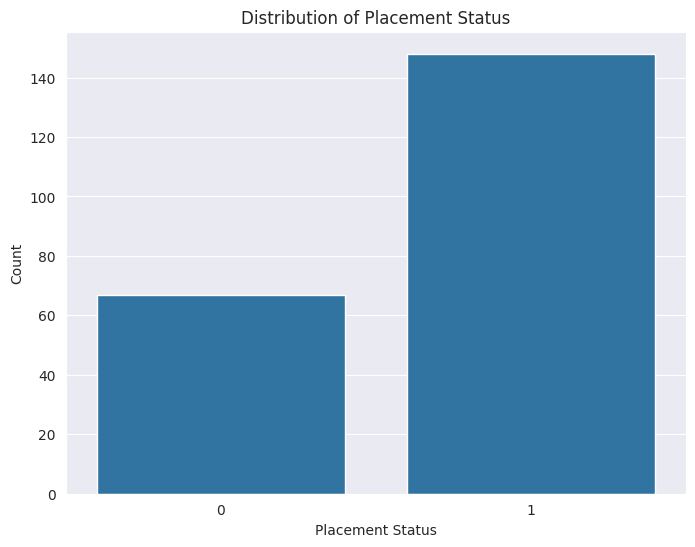

In [ ]:
# Distribution of placement status
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of placement status among the students in the dataset. Here, 0 represents students who were not placed, and 1 represents students who were placed.


The higher proportion of placed students suggests that the institution's placement activities are largely successful.

The strategies and practices in place for securing placements appear to be effective for most students.


The presence of a significant proportion of unplaced students indicates room for improvement.

Understanding the characteristics and challenges faced by these students can help in designing targeted support programs.

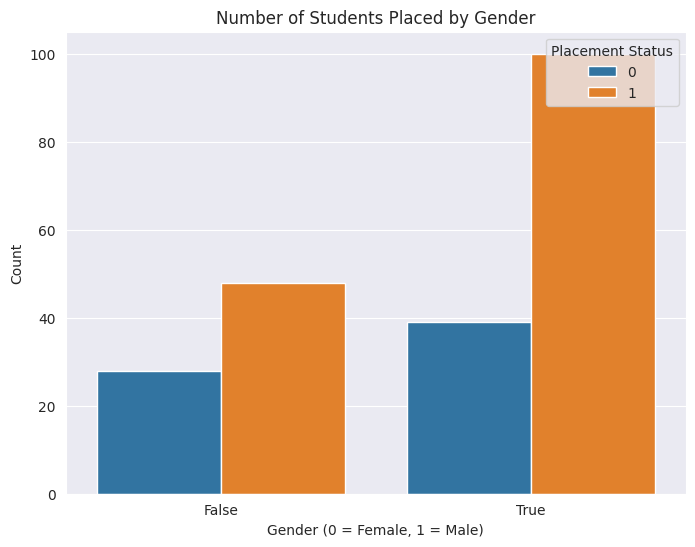

In [ ]:
# Number of students placed by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender_M', hue='status', data=df)
plt.title('Number of Students Placed by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Placement Status', loc='upper right')
plt.show()

The higher placement rate for male students indicates a potential gender disparity in campus placements.

The relatively balanced distribution for female students suggests that while many are being placed, a significant number are also not placed.

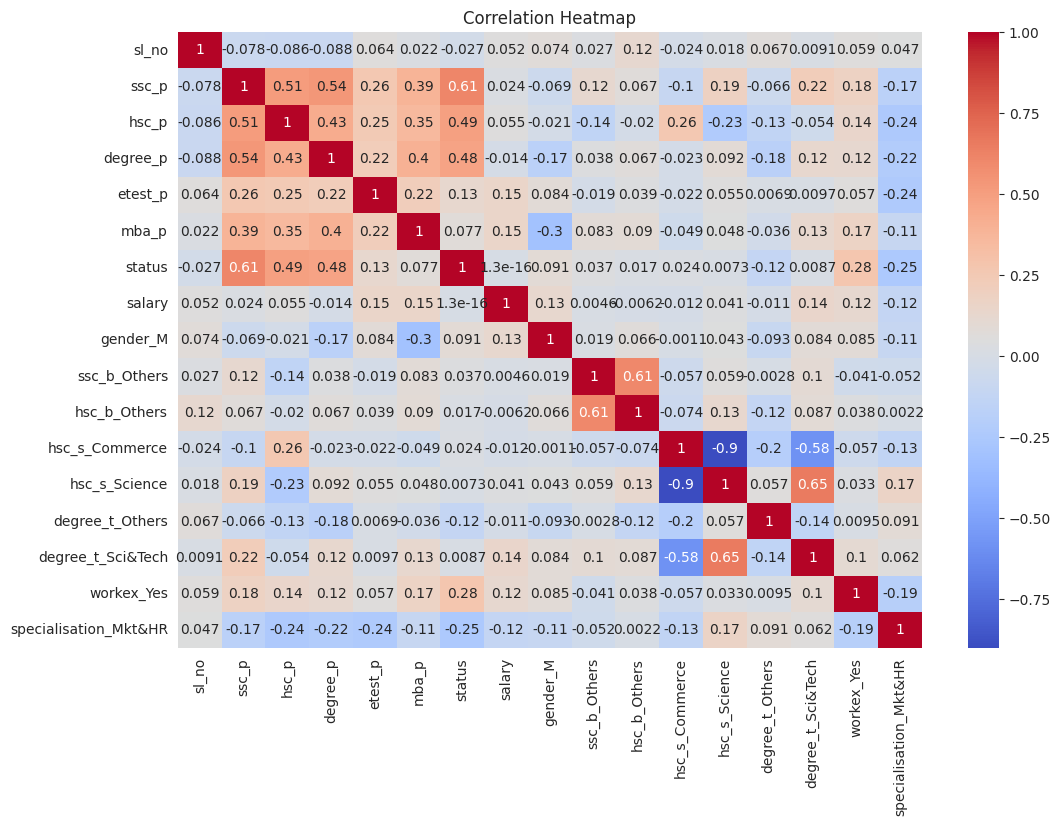

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Strong positive correlations are observed between ssc_p, hsc_p, degree_p, mba_p, and status.

Salary is positively correlated with placement status.

Weak or negative correlations are observed between employability test scores and other academic scores.

# Split the data to train and test sets

In [ ]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Selections and Training**

For the predictive modeling, the models to be used are Logistic Regression, Decision Tree, and Random Forest.

**Logistic Regression**

Logistic Regression is a simple yet powerful model that provides clear insights into the relationship between the predictors and the binary outcome (placement status).**It** serves as a good baseline model to compare against more complex models.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Evaluate the model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Precision: {precision_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Recall: {recall_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression F1-Score: {f1_score(y_test, y_pred_logreg)}')

Logistic Regression Accuracy: 0.7209302325581395
Logistic Regression Precision: 0.7435897435897436
Logistic Regression Recall: 0.9354838709677419
Logistic Regression F1-Score: 0.8285714285714285


In [ ]:
print(confusion_matrix(y_test, y_pred_logreg))

[[ 2 10]
 [ 2 29]]


TP: **29** These are the students who were correctly predicted to be placed (positive class) and were actually placed.

TN:**2** These are the students who were correctly predicted not to be placed (negative class) and were actually not placed.

FP: **10** These are the students who were predicted to be placed but were actually not placed. This is also known as a Type I error.

FN: 2 These are the students who were predicted not to be placed but were actually placed. This is also known as a Type II error.


High Recall: The model has a high recall, meaning it is good at identifying students who will be placed.

Moderate Precision: The precision is lower, indicating that there are some false positives (students predicted to be placed but not placed).

Overall Accuracy: The accuracy of 72.09% suggests that the model is reasonably good but has room for improvement.

**2. Decision Tree**

Decision Tree will be able to show different features interact to determine the placement status. It can highlight specific criteria (e.g., degree percentage thresholds) that strongly influence placement outcomes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Mske Predictions
y_pred_dt = dt.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(f'Decision Tree Precision: {precision_score(y_test, y_pred_dt)}')
print(f'Decision Tree Recall: {recall_score(y_test, y_pred_dt)}')
print(f'Decision Tree F1-Score: {f1_score(y_test, y_pred_dt)}')


Decision Tree Accuracy: 0.9767441860465116
Decision Tree Precision: 1.0
Decision Tree Recall: 0.967741935483871
Decision Tree F1-Score: 0.9836065573770492


In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

[[12  0]
 [ 1 30]]


TP: **30**
These are the students who were correctly predicted to be placed (positive class) and were actually placed.

TN: **12**
These are the students who were correctly predicted not to be placed (negative class) and were actually not placed.

FP: **0**
These are the students who were predicted to be placed but were actually not placed. This is also known as a Type I error.

FN: **1**
These are the students who were predicted not to be placed but were actually placed. This is also known as a Type II error.




**Random Forest**

Random Forest is an ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

Feature Importance: It provides insights into feature importance, helping identify which variables are most influential in predicting placement status.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Define and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions

y_pred_rf = rf.predict(X_test)

In [ ]:
# Evaluate the Random Forest model
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Random Forest Recall: {recall_score(y_test, y_pred_rf)}')
print(f'Random Forest F1-Score: {f1_score(y_test, y_pred_rf)}')

Random Forest Accuracy: 0.9534883720930233
Random Forest Precision: 0.967741935483871
Random Forest Recall: 0.967741935483871
Random Forest F1-Score: 0.967741935483871


In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[11  1]
 [ 1 30]]


# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Hyperparameter tuning for Random Forest model using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Evaluate the best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [ ]:
# Evaluate the tuned model
print(f'Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')
print(f'Tuned Random Forest Precision: {precision_score(y_test, y_pred_best_rf)}')
print(f'Tuned Random Forest Recall: {recall_score(y_test, y_pred_best_rf)}')
print(f'Tuned Random Forest F1-Score: {f1_score(y_test, y_pred_best_rf)}')

Tuned Random Forest Accuracy: 0.9534883720930233
Tuned Random Forest Precision: 0.967741935483871
Tuned Random Forest Recall: 0.967741935483871
Tuned Random Forest F1-Score: 0.967741935483871


In [ ]:
print(confusion_matrix(y_test, y_pred_best_rf))

[[11  1]
 [ 1 30]]


TP: **30** These are the students who were correctly predicted to be placed (positive class) and were actually placed.

TN: **11** These are the students who were correctly predicted not to be placed (negative class) and were actually not placed.


FP: **1** These are the students who were predicted to be placed but were actually not placed. This is also known as a Type I error.

FN: **1** These are the students who were predicted not to be placed but were actually placed. This is also known as a Type II error.

High Accuracy: The model has very high accuracy (95.34%), indicating it is highly effective at correctly predicting placement status.


High Precision: The model has high precision (96.77%), meaning most students predicted to be placed were actually placed.


High Recall: The model has high recall (96.77%), indicating it correctly identified most of the students who were actually placed.


Balanced F1-Score: The F1-Score of 0.9677 shows a good balance between precision and recall.

# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt),
    ('rf', rf)
], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(max_iter=1000)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
# Make predictions
y_pred_voting = voting_clf.predict(X_test)

In [ ]:
# Evaluate the Voting Classifier
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting)}')
print(f'Voting Classifier Precision: {precision_score(y_test, y_pred_voting)}')
print(f'Voting Classifier Recall: {recall_score(y_test, y_pred_voting)}')
print(f'Voting Classifier F1-Score: {f1_score(y_test, y_pred_voting)}')

Voting Classifier Accuracy: 0.9534883720930233
Voting Classifier Precision: 0.967741935483871
Voting Classifier Recall: 0.967741935483871
Voting Classifier F1-Score: 0.967741935483871


In [ ]:
print(confusion_matrix(y_test, y_pred_voting))

[[11  1]
 [ 1 30]]


The models built using Logistic Regression, Decision Tree, and Random Forest are capable of predicting whether a student will be recruited in campus placements with high accuracy.

The Random Forest model's robustness is confirmed as it consistently performs well with both default and tuned parameters.

This stability in performance metrics suggests that the model is well-suited for the dataset and the task of predicting placement status.
